## Elbow Method

It is a technique commonly used to determine the optimal number of clusters in a clustering algorithm. The elbow method is based on the idea that as the number of clusters increases, the variation within each cluster decreases. However, as more clusters are added, the benefit of a further reduction in within-cluster variation diminishes.

In the elbow method, the value of an evaluation metric (for example, the sum of the squares of the intra-cluster distances) is calculated for different values of k (the number of clusters). Then, the value of the evaluation metric is plotted as a function of k. The graph should have an "elbow" or curve shape that resembles a bent arm, suggesting that there is a point where increasing the number of clusters no longer provides a significant improvement in the evaluation metric.
The goal of the elbow method is to identify the number of clusters that produce the "elbow" in the curve, which indicates the point where there is a significant decrease in the improvement of the evaluation metric. This number of clusters is considered the optimal number of clusters for the clustering algorithm.

### And which flaws does it pose to assess quality?

* It does not take into account the distribution of the data: The elbow method does not take into account the distribution of the data, which means that it cannot be effective in identifying the optimal number of clusters in data with complex distributions. In such cases, it may be necessary to use more advanced evaluation techniques.
* Depends on choice of evaluation metric: The elbow method depends on the choice of evaluation metric used to calculate the quality of the clusters. Choosing an incorrect metric can lead to the selection of a suboptimal number of clusters.
* Can be subjective: The identification of the inflection point in the elbow method curve can be subjective and dependent on the interpretation of the user. In some cases, it can be difficult to determine if the curve has a clear inflection point.
* Can be misleading on data with overlapping clusters: The elbow method can be misleading on data with overlapping or irregularly shaped clusters. In such cases, it can be difficult to identify a clear inflection point in the curve.

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from unsupervised.kmeans_2 import K_Means
import random
import seaborn as sns

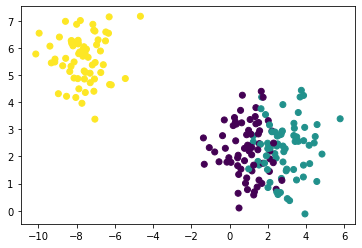

In [19]:
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.9, )
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.show()

In [20]:
def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j))
            
    colors = 10*["g","r","c","b","k"]
    j=0
    for i in input:
        plt.scatter(data[0][j,0], data[0][j,1], marker="x", color=colors[i], s=150, linewidths=5)
        j+=1
    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="o", color="k", s=150, linewidths=5)
    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="D", color="DarkBlue", s=150, linewidths=5)


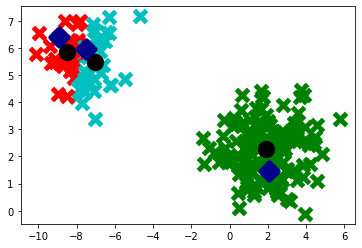

In [21]:
# Perform k-means clustering with centroids initialize='random'
kmeans = K_Means(k=3,data = data[0],centeriod_init='random')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
k=3
plot(data,k,index,centroids,orig_centroids)

### Elbow curve

Text(0, 0.5, 'Dispersion')

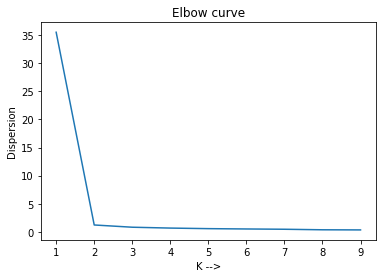

In [26]:
n_clusters=10
costs = []
for i in range(n_clusters):
    kmeans = K_Means(k=i,data = data[0],centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)
    
x = np.arange(n_clusters)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")